In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
amazon_data = pd.read_csv('AMZNtrain.csv')

In [3]:
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [4]:
amazon_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000
1257,2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500


In [5]:
amazon_data.shape

(1258, 7)

In [6]:
amazon_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
amazon_data.duplicated().sum()

0

In [8]:
amazon_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [10]:
amazon_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,823.840056,831.762583,814.173943,823.256543,823.256543,4.231814e+06
std,477.931392,482.851261,471.058235,476.952699,476.952699,2.400533e+06
min,284.399994,290.420013,284.000000,286.950012,286.950012,1.093000e+06
25%,393.892494,398.795006,388.427513,394.772492,394.772492,2.713950e+06
50%,726.450012,729.779999,720.079987,727.190002,727.190002,3.582300e+06
75%,1005.860016,1009.742493,997.122513,1002.762496,1002.762496,4.857900e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,2.385610e+07


In [11]:
amazon_data.nunique()

Date         1258
Open         1229
High         1237
Low          1241
Close        1248
Adj Close    1248
Volume       1245
dtype: int64

In [12]:
amazon_data = amazon_data.drop(columns=['Adj Close'])

In [13]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,2316500


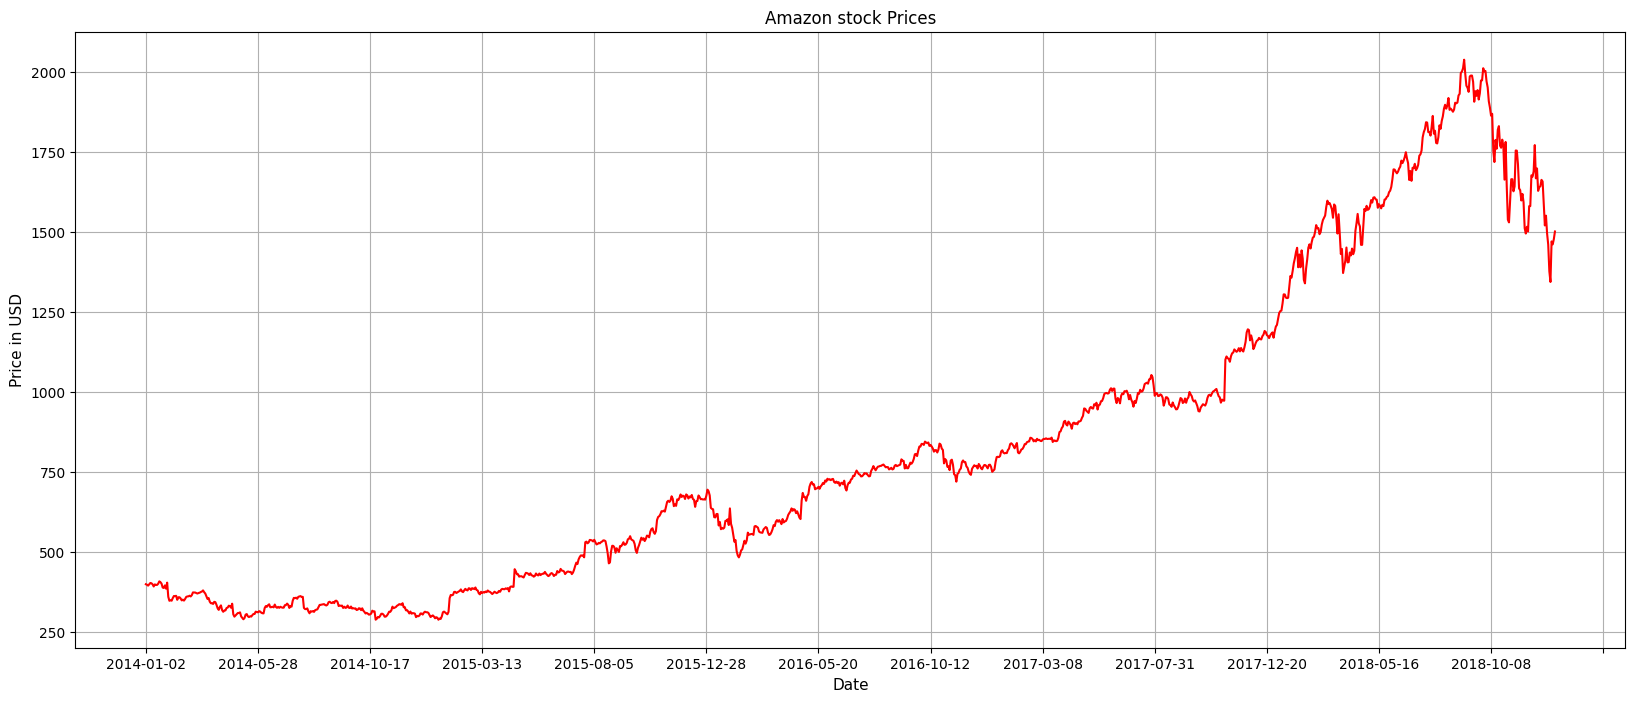

In [14]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(amazon_data['Date'], amazon_data['Close'], color = 'Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon stock Prices')
plt.grid()
plt.show()

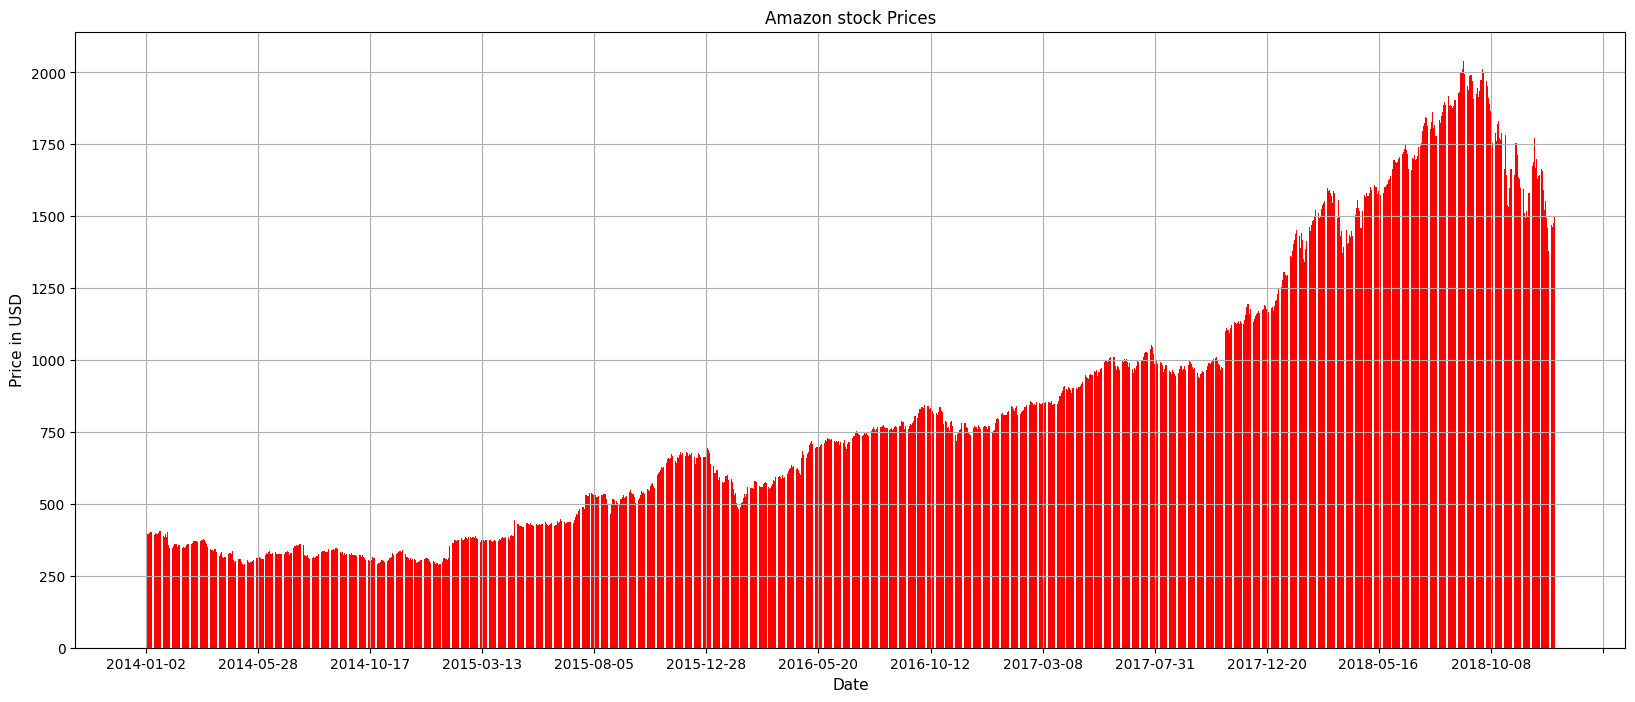

In [15]:
fig, ax = plt.subplots(figsize = (20,8))
ax.bar(amazon_data['Date'], amazon_data['Close'], color = 'Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon stock Prices')
plt.grid()
plt.show()

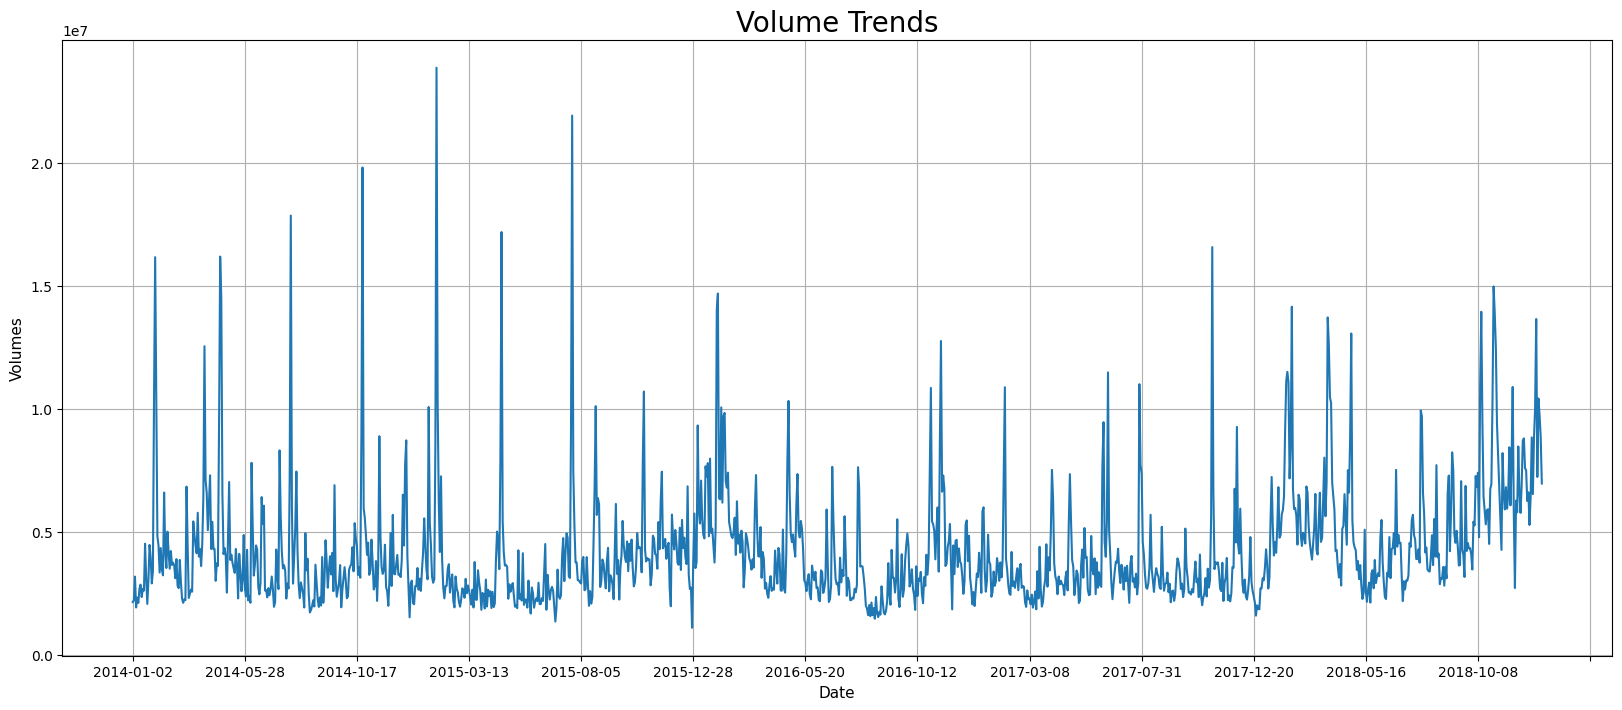

In [16]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(amazon_data['Date'], amazon_data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends',fontsize='20')
plt.grid()
plt.show()

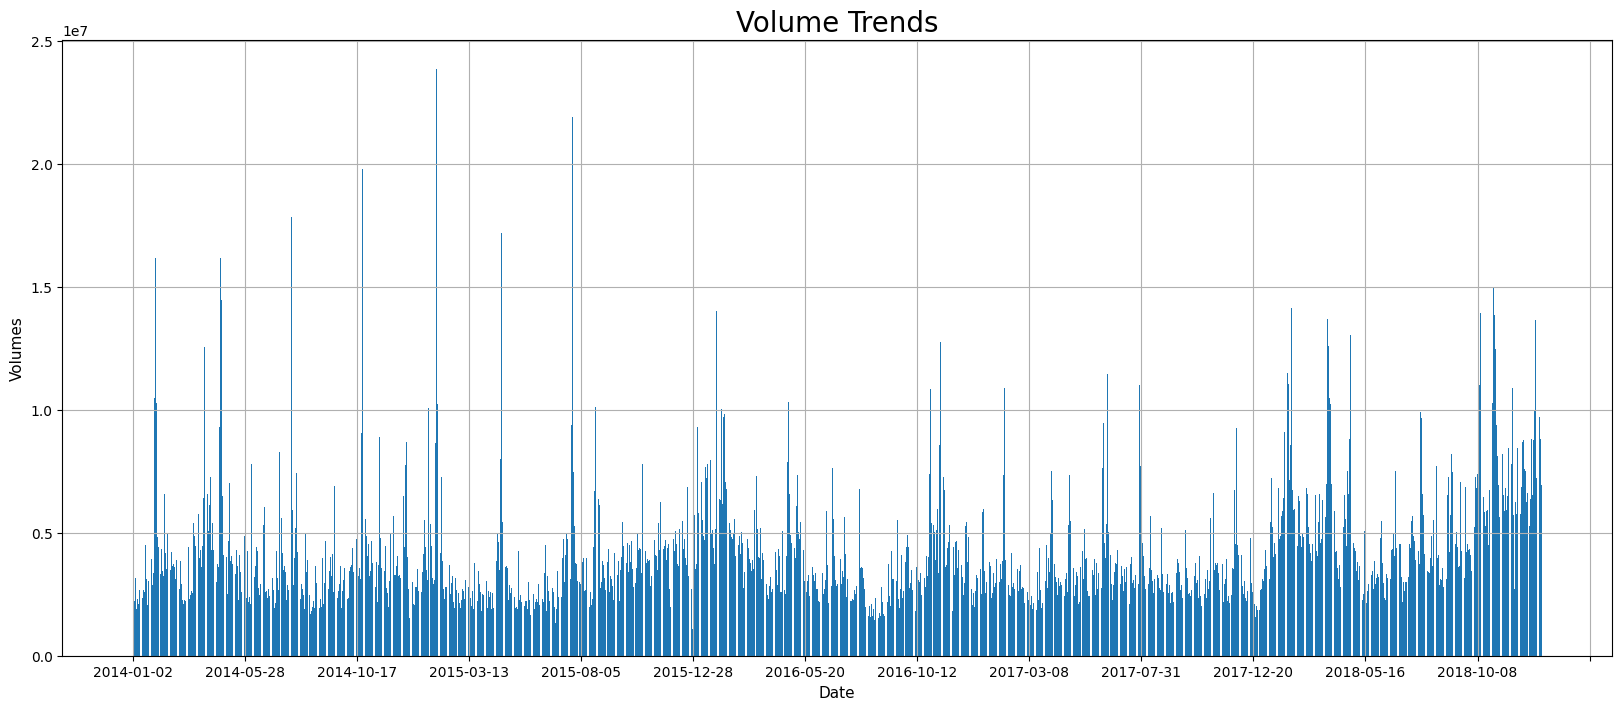

In [17]:
fig, ax = plt.subplots(figsize = (20,8))
ax.bar(amazon_data['Date'], amazon_data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends',fontsize='20')
plt.grid()
plt.show()

In [18]:
amazon_data['Market Cap'] = amazon_data['Open']*amazon_data['Volume']

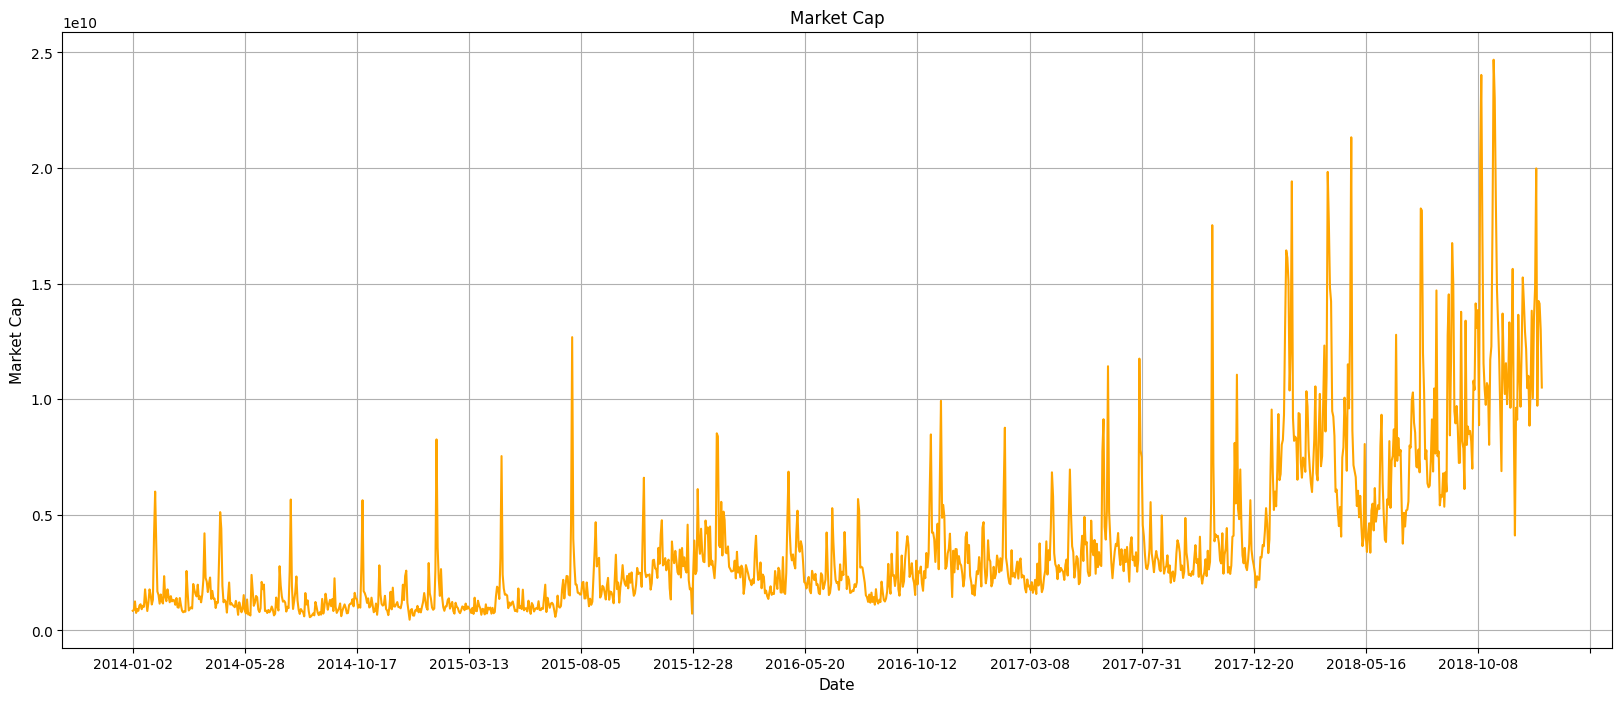

In [19]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(amazon_data['Date'], amazon_data['Market Cap'], color = 'orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

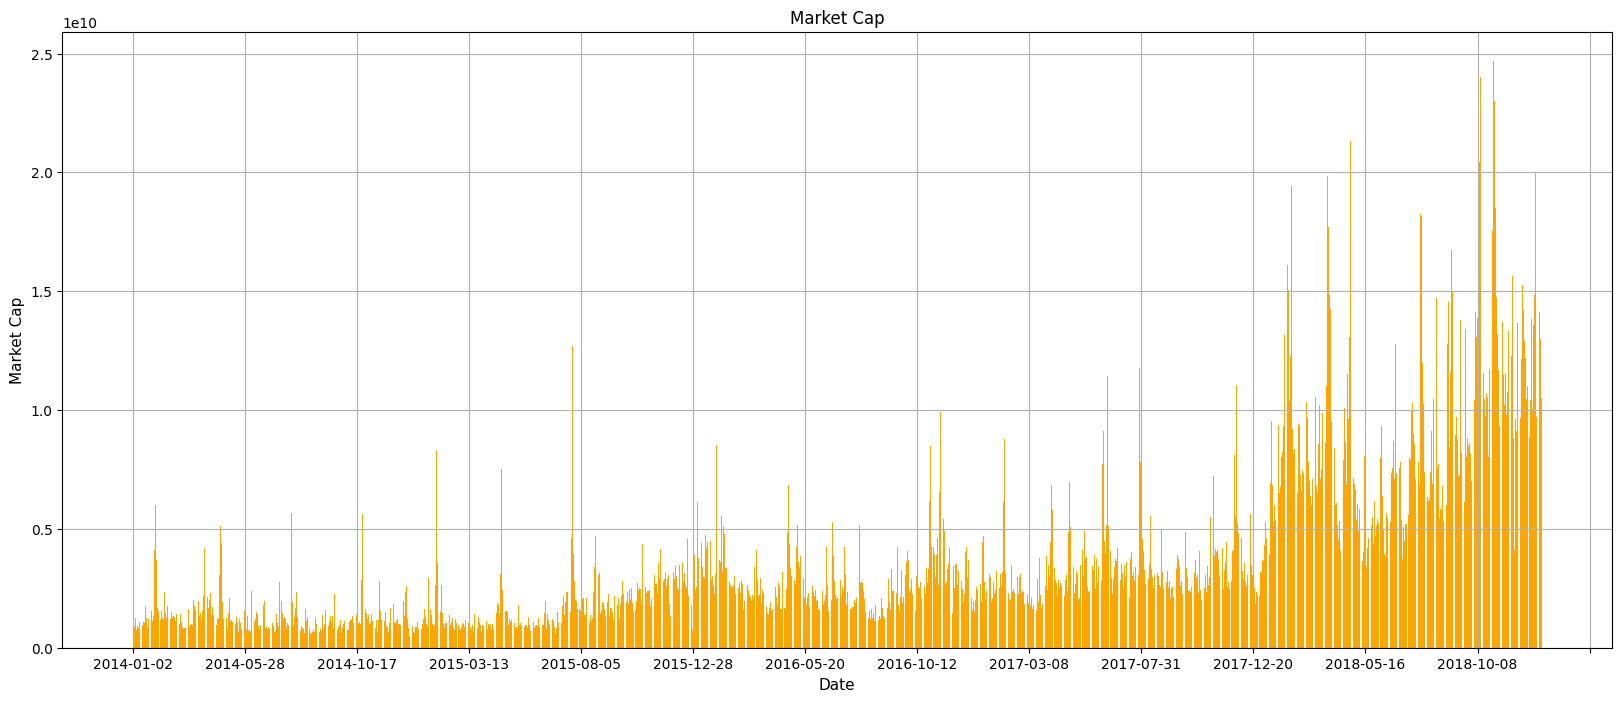

In [20]:
fig, ax = plt.subplots(figsize = (20,8))
ax.bar(amazon_data['Date'], amazon_data['Market Cap'], color = 'orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [21]:
amazon_data.iloc[amazon_data['Market Cap'].argmax()]

Date                  2018-10-26
Open                 1649.589966
High                 1698.459961
Low                       1603.0
Close                1642.810059
Volume                  14963800
Market Cap    24684134333.230801
Name: 1214, dtype: object

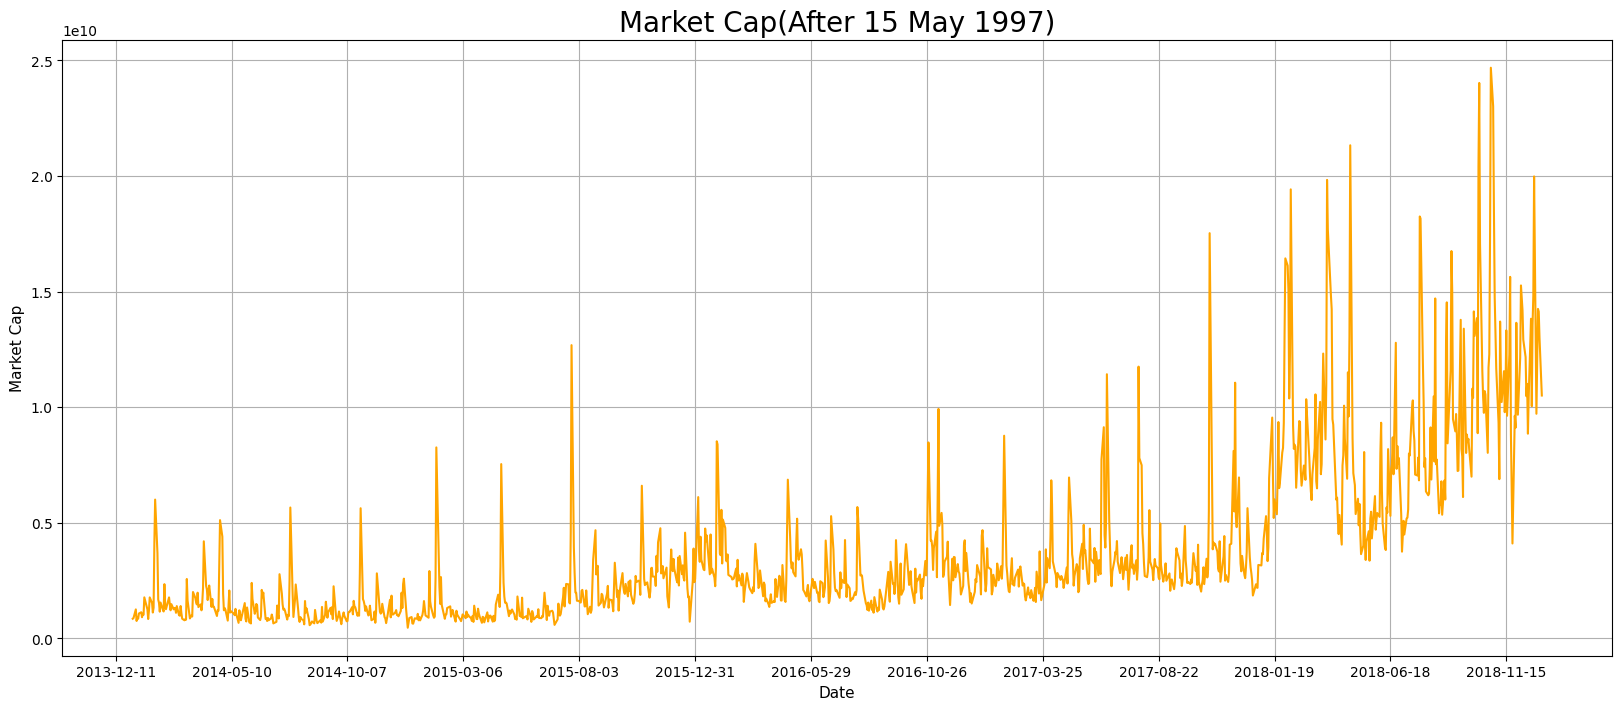

In [22]:
ohlc = amazon_data[(amazon_data['Date'] > '1997-05-15')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(ohlc['Date'], ohlc['Market Cap'], color = 'orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap(After 15 May 1997)', fontsize='20')
plt.grid()
plt.show()

In [23]:
amazon_data['vol'] = (amazon_data['Close']/amazon_data['Close'].shift(1)) - 1

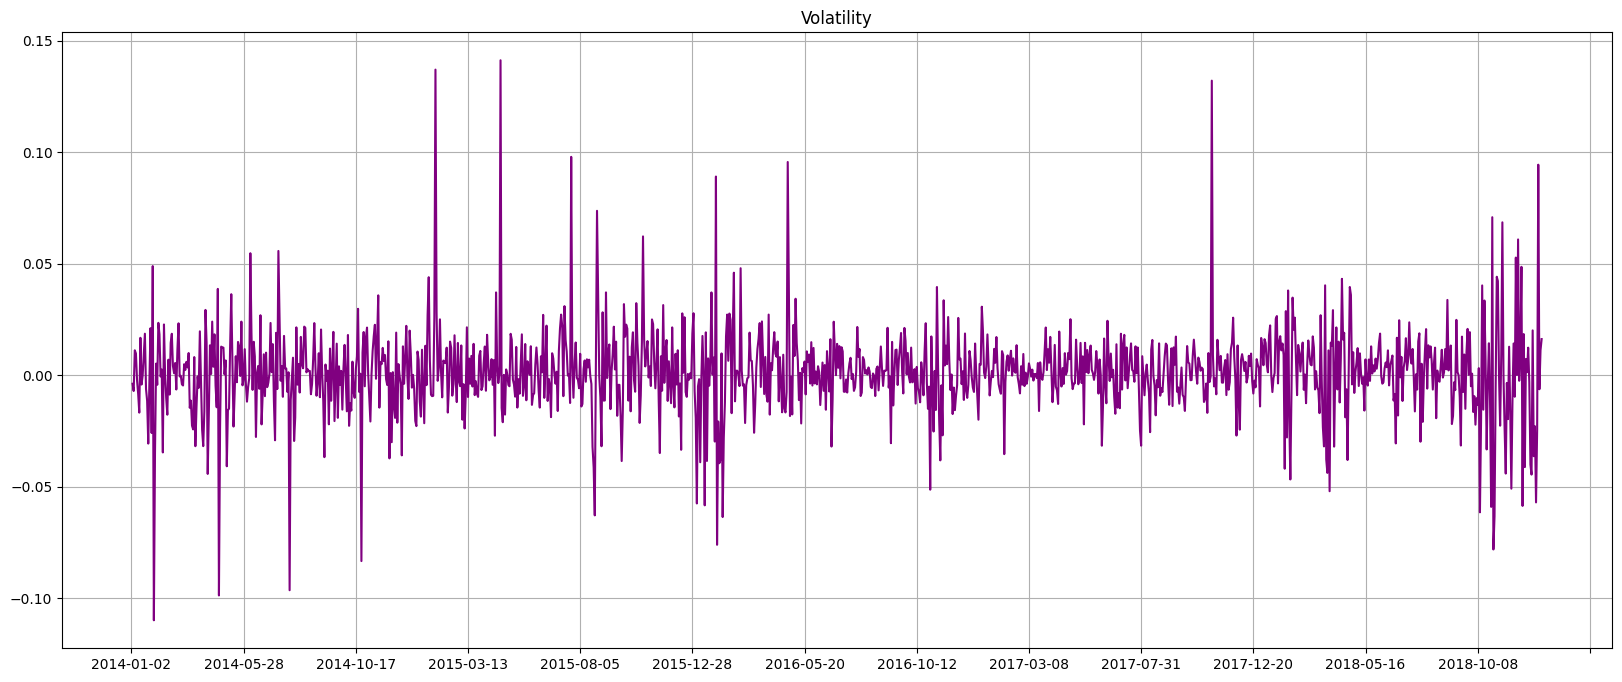

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()

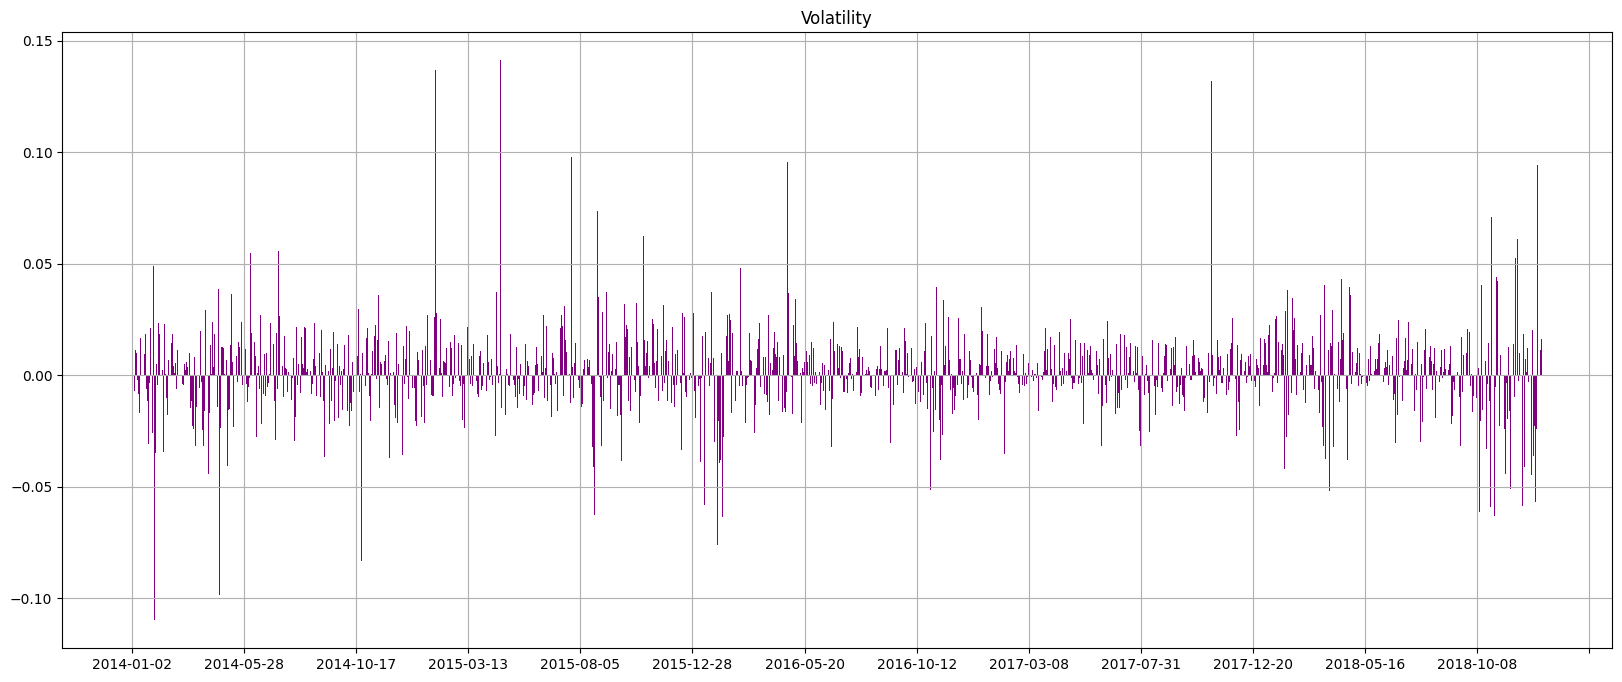

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['Date'], amazon_data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()

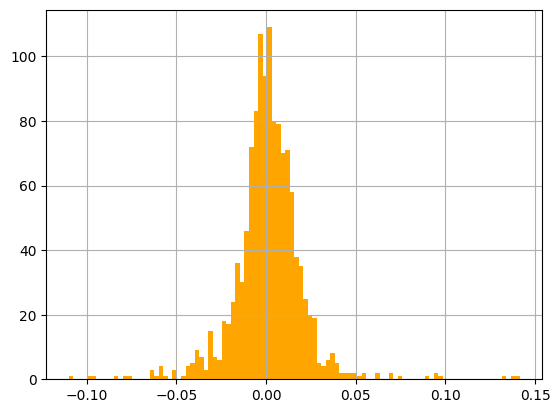

In [27]:
amazon_data['vol'].hist(bins=100, color='orange');

In [28]:
amazon_data['Cumulative Return'] = (1 + amazon_data['vol']).cumprod()

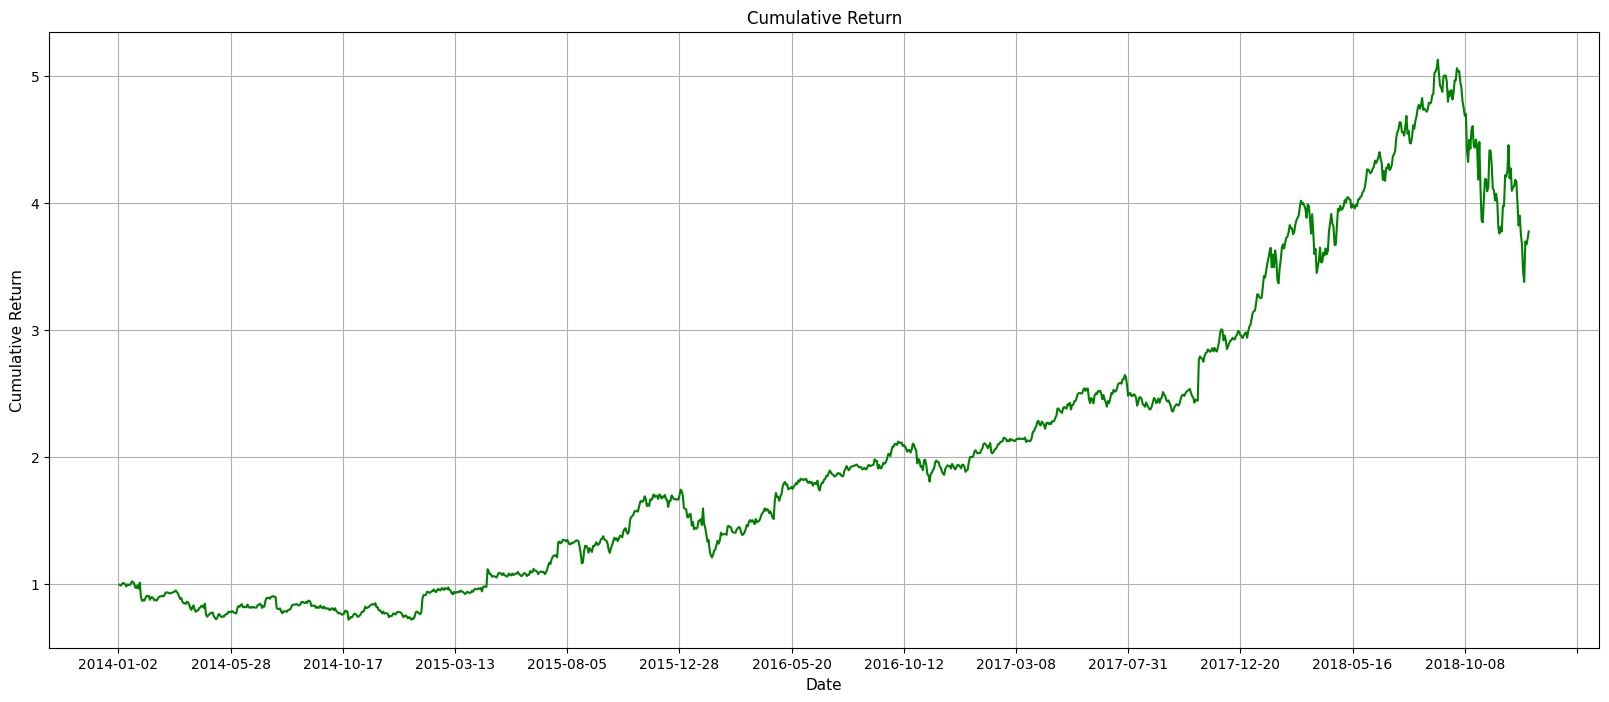

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

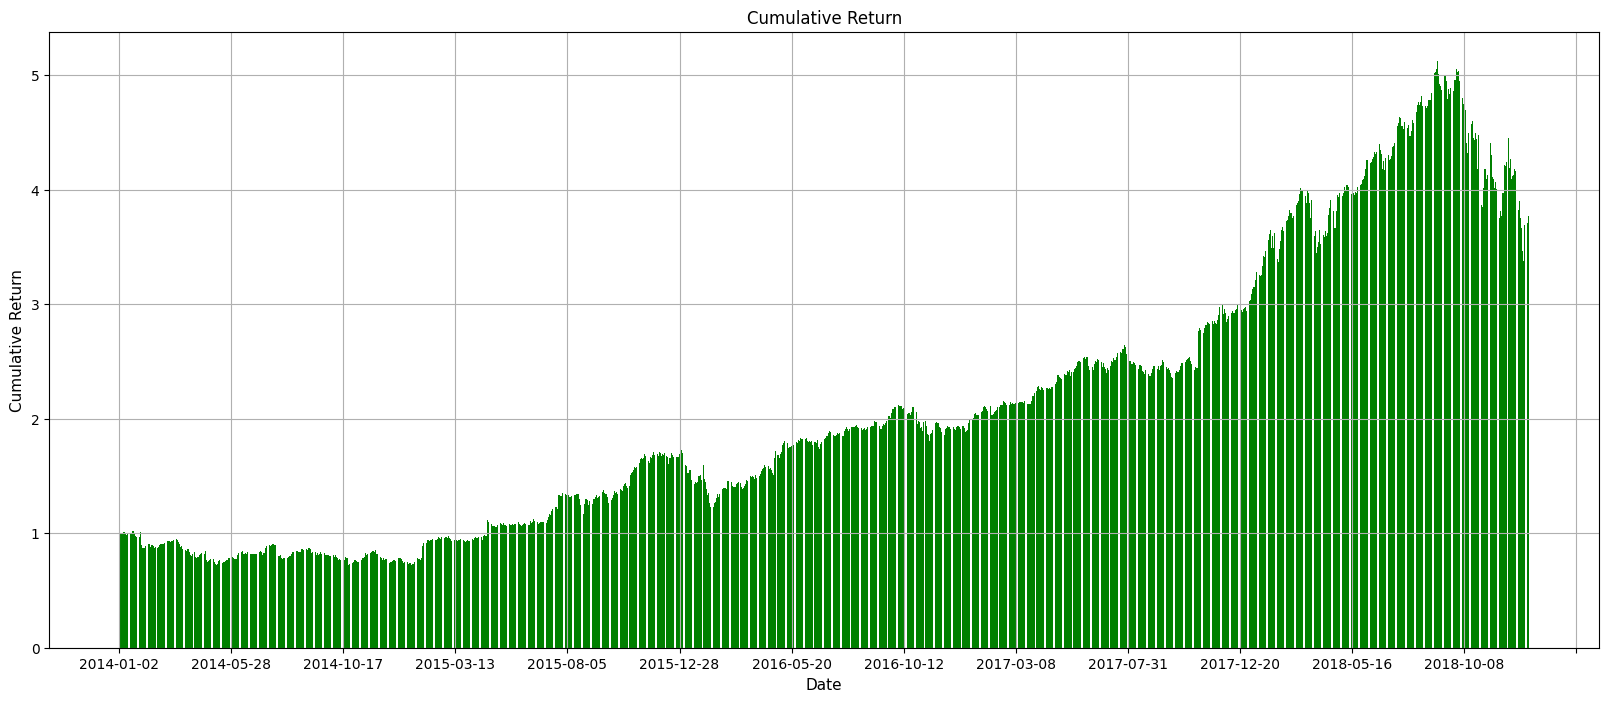

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['Date'], amazon_data['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

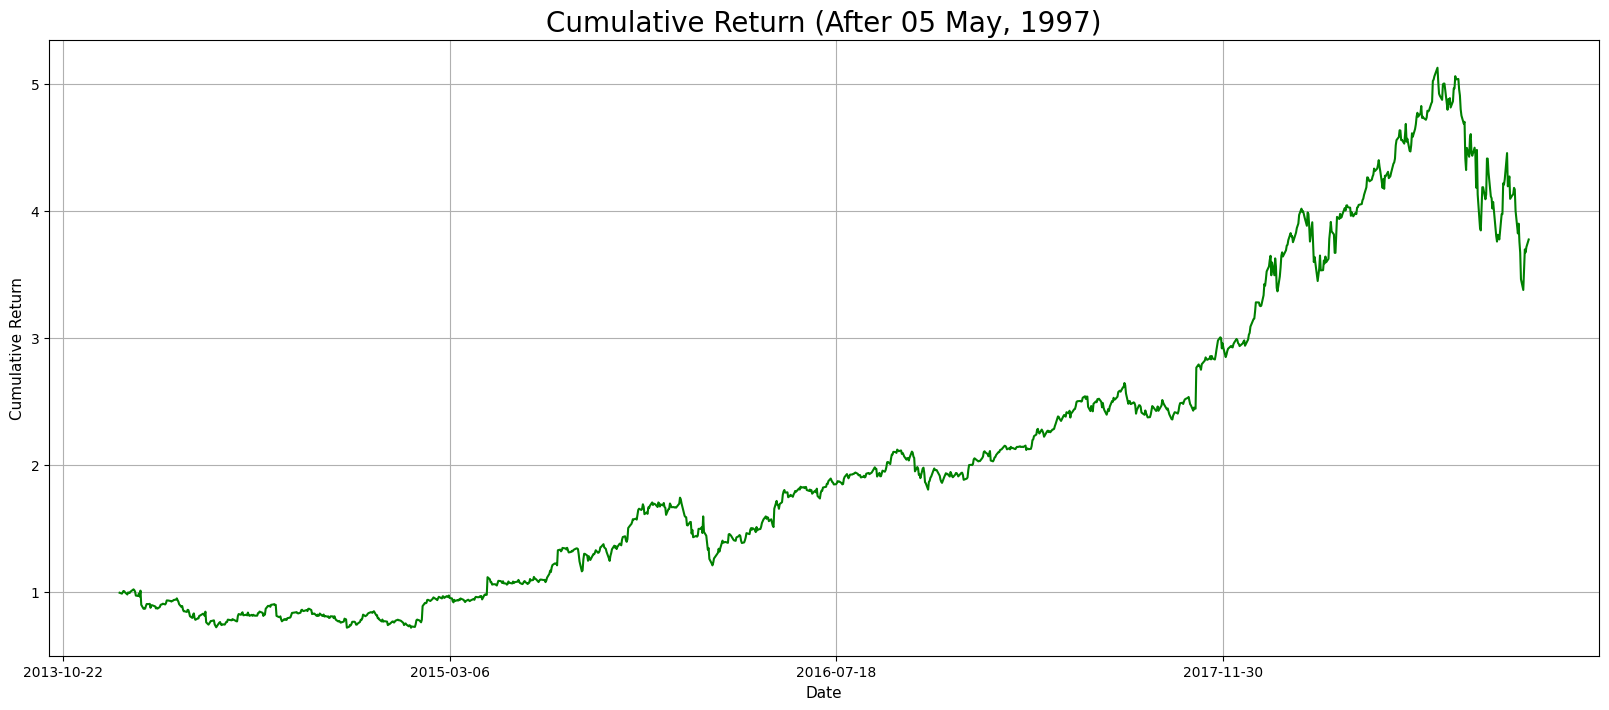

In [33]:
ohlc = amazon_data[(amazon_data['Date'] > '1997-05-15')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.grid()
plt.title('Cumulative Return (After 05 May, 1997)', fontsize='20')
plt.show()

In [34]:
amazon_data.iloc[amazon_data['Cumulative Return'].argmax()]

Date                    2018-09-04
Open                        2026.5
High                        2050.5
Low                         2013.0
Close                   2039.51001
Volume                     5721100
Market Cap           11593809150.0
vol                       0.013315
Cumulative Return         5.124783
Name: 1176, dtype: object

In [37]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [38]:
amazon_data['Date'] = pd.to_datetime(amazon_data['Date'])
amazon_data.set_index('Date',inplace=True)

In [39]:
data = amazon_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1007

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.06334733],
       [0.06247432],
       [0.06087095],
       ...,
       [0.67027092],
       [0.67961725],
       [0.69328295]])

In [42]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.06334733, 0.06247432, 0.06087095, 0.06338156, 0.06560118,
       0.06508194, 0.06317044, 0.05935888, 0.06310197, 0.06214908,
       0.06210913, 0.06428309, 0.06852831, 0.06709613, 0.06443145,
       0.05743027, 0.05667708, 0.06132742, 0.05549025, 0.06622312,
       0.0409344 , 0.03377915, 0.03480623, 0.03395034, 0.03859496,
       0.04229811, 0.04217829, 0.04270324, 0.03554799, 0.04008422,
       0.04016981, 0.0380586 , 0.03448098, 0.03586181, 0.03412722,
       0.03699159, 0.04072328, 0.04156775, 0.04175606, 0.04288013,
       0.04155634, 0.04390719, 0.04874012, 0.0486203 , 0.04856324,
       0.04769023, 0.04671452, 0.047753  , 0.04824942, 0.04952183,
       0.05026361, 0.05239192, 0.04923084, 0.0468001 , 0.04203564,
       0.03703154, 0.03866343, 0.03221573, 0.02939699, 0.02929429])]
[0.02819873959031216]



In [43]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [44]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(947, 60, 1)

In [45]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
947/947 [==============================] - 117s 93ms/step - loss: 5.9955e-04
Epoch 2/10
947/947 [==============================] - 64s 67ms/step - loss: 2.7347e-04
Epoch 3/10
947/947 [==============================] - 63s 67ms/step - loss: 2.7990e-04
Epoch 4/10
947/947 [==============================] - 64s 68ms/step - loss: 2.4097e-04
Epoch 5/10
947/947 [==============================] - 71s 75ms/step - loss: 1.5627e-04
Epoch 6/10
947/947 [==============================] - 98s 103ms/step - loss: 1.6440e-04
Epoch 7/10
947/947 [==============================] - 66s 69ms/step - loss: 1.7018e-04
Epoch 8/10
947/947 [==============================] - 63s 67ms/step - loss: 1.0605e-04
Epoch 9/10
947/947 [==============================] - 64s 67ms/step - loss: 1.2536e-04
Epoch 10/10
947/947 [==============================] - 62s 65ms/step - loss: 9.7541e-05


In [48]:
test_data= scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [49]:
x_test = np.array(x_test)

In [50]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(251, 60, 1)

In [51]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 13s 141ms/step


In [52]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

12.29746345209786

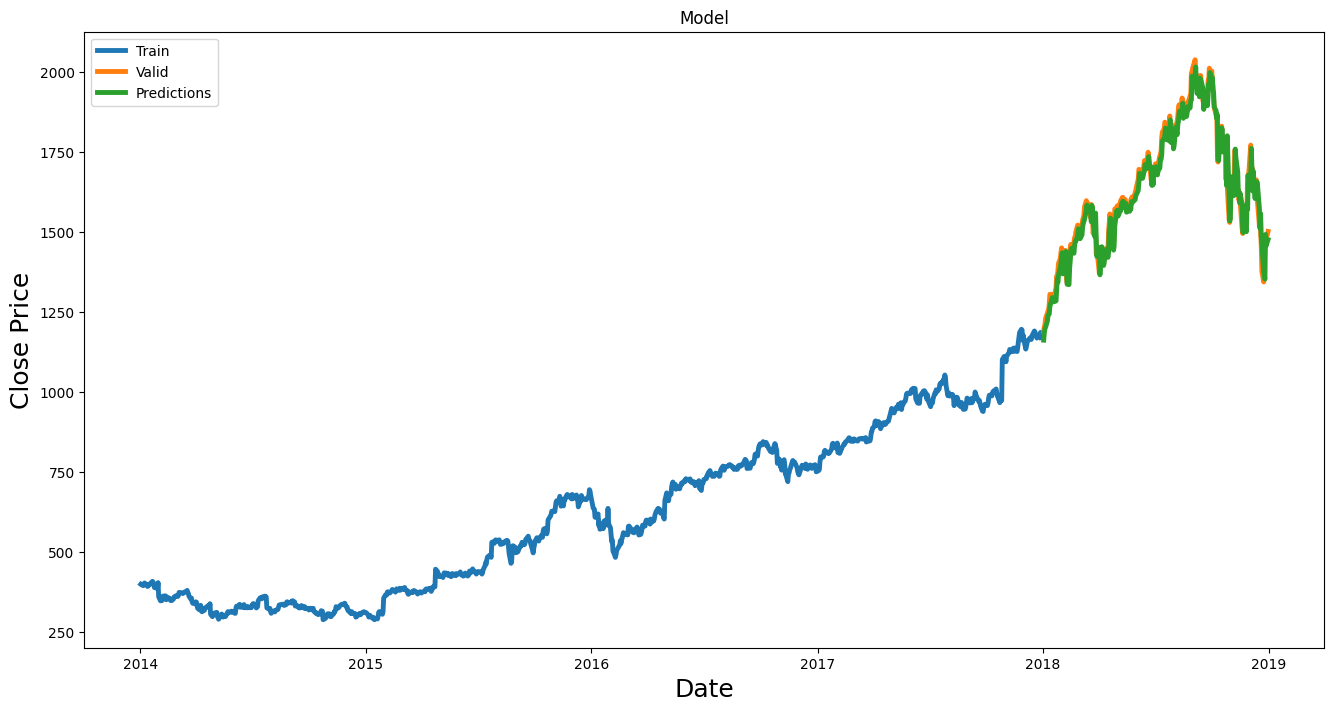

In [53]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper left')
plt.show()

In [54]:
valid

,Close,Predictions
Date,,
2018-01-02,1189.010010,1161.851318
2018-01-03,1204.199951,1184.208740
2018-01-04,1209.589966,1197.906250
2018-01-05,1229.140015,1201.763428
2018-01-08,1246.869995,1221.600098
...,...,...
2018-12-24,1343.959961,1375.783203
2018-12-26,1470.900024,1352.696167
2018-12-27,1461.640015,1492.773926


In [56]:
amazon_quote = pd.read_csv('AMZNtrain.csv')
new_amazon_data = amazon_quote.filter(['Close'])
last_60_days = new_amazon_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price= model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 1s 1s/step


array([[1497.3364]], dtype=float32)